<br><br><img src="delhivery-logo.png" alt="Delhivery" style="width:220px;height:70px;"><br><br>


# <center>Business Case: Delhivery - Feature Engineering</center>

### 1. Business Problem 

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.
The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

The company wants to understand and process the data coming out of data engineering pipelines:
• Clean, sanitize and manipulate data to get useful features out of raw fields
• Make sense out of the raw data and help the data science team to build forecasting models on it

### Column Profiling:


data - tells whether the data is testing or training data
<br>trip_creation_time – Timestamp of trip creation
<br>route_schedule_uuid – Unique Id for a particular route schedule
route_type – Transportation type
oFTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
<br>oCarting: Handling system consisting of small vehicles (carts)
<br>trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
<br>source_center - Source ID of trip origin
<br>source_name - Source Name of trip origin
<br>destination_cente – Destination ID
<br>destination_name – Destination Name
<br>od_start_time – Trip start time
<br>od_end_time – Trip end time
<br>start_scan_to_end_scan – Time taken to deliver from source to destination
<br>is_cutoff – Unknown field
<br>cutoff_factor – Unknown field
<br>cutoff_timestamp – Unknown field
<br>actual_distance_to_destination – Distance in Kms between source and destination warehouse
<br>actual_time – Actual time taken to complete the delivery (Cumulative)
<br>osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
<br>osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
<br>factor – Unknown field
<br>segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
<br>segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
<br>segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
<br>segment_factor – Unknown field

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from scipy.stats import norm

### Reading the dataset

In [3]:
df=pd.read_csv('delhivery_data.csv')

In [4]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


### Length of data

In [5]:
len(df)

144867

### Shape of the dataset

In [6]:
df.shape

(144867, 24)

### Different attributes in dataset

In [7]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

### Checking for duplicates values

In [8]:
df.duplicated().value_counts()

False    144867
dtype: int64

### Data types of the attributes

In [9]:
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

### Viewing the overall information about the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

### Converting object data types to date time

In [11]:
df['trip_creation_time']=pd.to_datetime(df['trip_creation_time'])
df['od_start_time']=pd.to_datetime(df['od_start_time'])
df['od_end_time']=pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp']=pd.to_datetime(df['cutoff_timestamp'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

### Total number of unique values in each columns of the dataset

In [13]:
for i in df.columns:
    print(i,':',df[i].nunique())

data : 2
trip_creation_time : 14817
route_schedule_uuid : 1504
route_type : 2
trip_uuid : 14817
source_center : 1508
source_name : 1498
destination_center : 1481
destination_name : 1468
od_start_time : 26369
od_end_time : 26369
start_scan_to_end_scan : 1915
is_cutoff : 2
cutoff_factor : 501
cutoff_timestamp : 93180
actual_distance_to_destination : 144515
actual_time : 3182
osrm_time : 1531
osrm_distance : 138046
factor : 45641
segment_actual_time : 747
segment_osrm_time : 214
segment_osrm_distance : 113799
segment_factor : 5675


### The statistical summary of numerical values in the dataset

In [14]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


### The statistical summary of  non-numerical values in the dataset

In [15]:
df.describe(include = 'object')

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144574,144867,144606
unique,2,1504,2,14817,1508,1498,1481,1468
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104858,1812,99660,101,23347,23347,15192,15192


### Analysing the correlation between each columns.

In [16]:
data_correlation=df.corr()
data_correlation

,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
start_scan_to_end_scan,1.000000,0.299099,0.784673,0.785006,0.785937,0.785298,0.784138,-0.023193,0.093301,0.219848,0.306983,-0.020227
is_cutoff,0.299099,1.000000,0.190815,0.191571,0.168265,0.186484,0.188245,-0.121386,-0.007042,0.216321,0.254645,-0.106569
cutoff_factor,0.784673,0.190815,1.000000,0.999986,0.978720,0.995833,0.997116,-0.064551,0.044986,0.157936,0.231106,-0.031452
actual_distance_to_destination,0.785006,0.191571,0.999986,1.000000,0.978659,0.995872,0.997149,-0.064736,0.045241,0.158832,0.232119,-0.031603
actual_time,0.785937,0.168265,0.978720,0.978659,1.000000,0.977998,0.979399,0.033502,0.124411,0.171465,0.242282,0.017558
osrm_time,0.785298,0.186484,0.995833,0.995872,0.977998,1.000000,0.999119,-0.069074,0.049892,0.177066,0.242282,-0.033057
osrm_distance,0.784138,0.188245,0.997116,0.997149,0.979399,0.999119,1.000000,-0.065384,0.048705,0.169151,0.239669,-0.031805
factor,-0.023193,-0.121386,-0.064551,-0.064736,0.033502,-0.069074,-0.065384,1.000000,0.518388,-0.053187,-0.036761,0.540403
segment_actual_time,0.093301,-0.007042,0.044986,0.045241,0.124411,0.049892,0.048705,0.518388,1.000000,0.433422,0.448959,0.483864
segment_osrm_time,0.219848,0.216321,0.157936,0.158832,0.171465,0.177066,0.169151,-0.053187,0.433422,1.000000,0.948523,-0.068447


### Separating the columns into Categorical columns And Numerical columns.

#### Categorical Columns

In [17]:
cat_columns=df.dtypes=='object'
category=list(cat_columns[cat_columns].index)

In [18]:
category_data=df[category]
category_data

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
0,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
1,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
2,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
3,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
4,training,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat)
...,...,...,...,...,...,...,...,...
144862,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
144863,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
144864,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
144865,training,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)


### Numerical Columns

In [19]:
num_columns=df.dtypes!='object'
numerical=list(num_columns[num_columns].index)

In [20]:
numerical_data=df[numerical]
numerical_data

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,2018-09-20 02:35:36.476840,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20.000000,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18.000000,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18.000000,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,2018-09-20 16:24:28.436231,2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19.000000,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


### Count of null values in dataset

In [21]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

<b>Insights :</b><br>
###### ---> In this whole data only source_name and destination_name have missing values. Destination_name have 261 missing value and Source_name have 293 missing value

### Managing missing values in data

In [22]:
def missing_to_df(df):
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df

In [23]:
missing_to_df(df)

,Total,Percent
source_name,293,0.202254
destination_name,261,0.180165
data,0,0.000000
cutoff_factor,0,0.000000
segment_osrm_distance,0,0.000000
segment_osrm_time,0,0.000000
segment_actual_time,0,0.000000
factor,0,0.000000
osrm_distance,0,0.000000
osrm_time,0,0.000000


### The columns having null values.

In [24]:
missing_df = missing_to_df(df)
missing_df[missing_df['Total'] > 0]

,Total,Percent
source_name,293,0.202254
destination_name,261,0.180165


<b>Insights :</b><br>
###### ---> In source_name almost 20% of data are null. 
###### ---> In destination_name almost 18% data are null.

### Replacing missing values using Frequency imputer.

In [25]:
# Highest Freq imputation for some categorical columns
cat_missing = ['source_name', 'destination_name']
freq_imputer = SimpleImputer(strategy = 'most_frequent')
for col in cat_missing:
    df[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[col])))

In [26]:
missing_df = missing_to_df(df)
missing_df[missing_df['Total'] > 0]

,Total,Percent


In [27]:
missing_to_df(df)

,Total,Percent
data,0,0.0
trip_creation_time,0,0.0
segment_osrm_distance,0,0.0
segment_osrm_time,0,0.0
segment_actual_time,0,0.0
factor,0,0.0
osrm_distance,0,0.0
osrm_time,0,0.0
actual_time,0,0.0
actual_distance_to_destination,0,0.0


<b>Insights :</b><br>
###### ---> All the null values are replaced using Frequency imputer. 

## 3.In-depth analysis and feature engineering.

### Grouping  and adding the sub columns in the dataset

In [28]:
df['df_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
df_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
for col in df_cols:
    df[col + '_sum'] = df.groupby('df_key')[col].cumsum()  
df[[col + '_sum' for col in df_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


### Aggrigating the Dataset with respect to the data grouped above.

In [29]:
dict1 = {
 'data' : 'first',
 'trip_creation_time' : 'first',
 'route_schedule_uuid' : 'first',
 'route_type' : 'first',
 'trip_uuid' : 'first',
 'source_center' : 'first',
 'source_name' : 'first',
 'destination_center' : 'last',
 'destination_name' : 'last',
 'od_start_time' : 'first',
 'od_end_time' : 'first',
 'start_scan_to_end_scan' : 'first',
 'actual_distance_to_destination' : 'last',
 'actual_time' : 'last',
 'osrm_time' : 'max',
 'osrm_distance' : 'last',
 'segment_actual_time_sum' : 'last',
 'segment_osrm_distance_sum' : 'last',
 'segment_osrm_time_sum' : 'last', 
}

In [30]:
df1 = df.groupby('df_key').agg(dict1).reset_index()
df1 = df1.sort_values(by=['df_key','od_end_time'], ascending=True).reset_index()

In [31]:
df1

,index,df_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


### Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [32]:
df1['od_time_diff_hour'] = (df1['od_end_time'] - df1['od_start_time']).dt.total_seconds() /(60)
df1['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26363      62.115193
26364      91.087797
26365      44.174403
26366     287.474007
26367      66.933565
Name: od_time_diff_hour, Length: 26368, dtype: float64

In [33]:
df['od_time_diff_hour'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() /(60)
df['od_time_diff_hour']

0          86.213637
1          86.213637
2          86.213637
3          86.213637
4          86.213637
             ...    
144862    427.686364
144863    427.686364
144864    427.686364
144865    427.686364
144866    427.686364
Name: od_time_diff_hour, Length: 144867, dtype: float64

In [34]:
df1

,index,df_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,349.0,446.5496,728.0,670.6205,534.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,394.0,544.8027,820.0,649.8528,474.0,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0,62.115193
26364,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0,91.087797
26365,26365,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0,44.174403
26366,26366,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0,287.474007


In [35]:
dict2 = {
 'data' : 'first',
 'trip_creation_time' : 'first',
 'route_schedule_uuid' : 'first',
 'route_type' : 'first',
 'trip_uuid' : 'first',
 'source_center' : 'first',
 'source_name' : 'first',
 'destination_center' : 'last',
 'destination_name' : 'last',
 'start_scan_to_end_scan' : 'sum',
 'od_time_diff_hour' : 'sum',
 'actual_distance_to_destination' : 'sum',
 'actual_time' : 'sum',
 'osrm_time' : 'sum',
 'osrm_distance' : 'sum',
 'segment_actual_time_sum' : 'sum',
 'segment_osrm_distance_sum' : 'sum',
 'segment_osrm_time_sum' : 'sum', 
}

In [36]:
df_hp = df1.groupby('trip_uuid').agg(dict2).reset_index(drop = True)

In [37]:
df_hp

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,743.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1741.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,54.0,58.9037,281.0,104.8866,88.0
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,184.0,171.1103,258.0,223.5324,221.0


In [105]:
df_hp['destination_name']=df_hp['destination_name'].str.lower()
df_hp['source_name'] = df_hp['source_name'].str.lower()

In [106]:
dr=df_hp.copy()
x=dr["destination_name"].str.split("(", expand = True)
x[1]=x[1].str.rstrip(')')
y=x[0].str.split("_", expand = True)
print(x)
y
df_hp['dest_city']  = y[0]
df_hp['dest_place'] = y[1]
df_hp['dest_state'] = x[1]

                            0              1
0         kanpur_central_h_6   uttar pradesh
1      doddablpur_chikadpp_d       karnataka
2        gurgaon_bilaspur_hb         haryana
3           mumbai_mirard_ip     maharashtra
4          sandur_wrdn1dpp_d       karnataka
...                       ...            ...
14812  chandigarh_mehmdpur_h          punjab
14813   faridabad_blbgarh_dc         haryana
14814     kanpur_govndngr_dc   uttar pradesh
14815  tirchchndr_shnmgprm_d      tamil nadu
14816      sandur_wrdn1dpp_d       karnataka

[14817 rows x 2 columns]


In [107]:
x=dr["source_name"].str.split("(", expand = True)
x[1]=x[1].str.rstrip(')')
y=x[0].str.split("_", expand = True)
print(x)
y
df_hp['source_city']  = y[0]
df_hp['source_place'] = y[1]
df_hp['source_state'] = x[1]

                             0              1
0          kanpur_central_h_6   uttar pradesh
1       doddablpur_chikadpp_d       karnataka
2         gurgaon_bilaspur_hb         haryana
3                  mumbai hub     maharashtra
4                  bellary_dc       karnataka
...                        ...            ...
14812   chandigarh_mehmdpur_h          punjab
14813      fbd_balabhgarh_dpc         haryana
14814      kanpur_govndngr_dc   uttar pradesh
14815  tirunelveli_vdkkusrt_i      tamil nadu
14816       sandur_wrdn1dpp_d       karnataka

[14817 rows x 2 columns]


In [39]:
df_hp['trip_creation_year'] = df_hp['trip_creation_time'].dt.year
df_hp['trip_creation_month'] = df_hp['trip_creation_time'].dt.month
df_hp['trip_creation_day'] = df_hp['trip_creation_time'].dt.day
df_hp

                            0              1
0         kanpur_central_h_6   uttar pradesh
1      doddablpur_chikadpp_d       karnataka
2        gurgaon_bilaspur_hb         haryana
3           mumbai_mirard_ip     maharashtra
4          sandur_wrdn1dpp_d       karnataka
...                       ...            ...
14812  chandigarh_mehmdpur_h          punjab
14813   faridabad_blbgarh_dc         haryana
14814     kanpur_govndngr_dc   uttar pradesh
14815  tirchchndr_shnmgprm_d      tamil nadu
14816      sandur_wrdn1dpp_d       karnataka

[14817 rows x 2 columns]
                             0              1
0          kanpur_central_h_6   uttar pradesh
1       doddablpur_chikadpp_d       karnataka
2         gurgaon_bilaspur_hb         haryana
3                  mumbai hub     maharashtra
4                  bellary_dc       karnataka
...                        ...            ...
14812   chandigarh_mehmdpur_h          punjab
14813      fbd_balabhgarh_dpc         haryana
14814      kanpur_go

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,segment_osrm_time_sum,dest_city,dest_place,dest_state,source_city,source_place,source_state,trip_creation_year,trip_creation_month,trip_creation_day
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,1008.0,kanpur,central,uttar pradesh,kanpur,central,uttar pradesh,2018,9,12
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,65.0,doddablpur,chikadpp,karnataka,doddablpur,chikadpp,karnataka,2018,9,12
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,1941.0,gurgaon,bilaspur,haryana,gurgaon,bilaspur,haryana,2018,9,12
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,16.0,mumbai,mirard,maharashtra,mumbai hub,None,maharashtra,2018,9,12
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,115.0,sandur,wrdn1dpp,karnataka,bellary,dc,karnataka,2018,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,62.0,chandigarh,mehmdpur,punjab,chandigarh,mehmdpur,punjab,2018,10,3
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,11.0,faridabad,blbgarh,haryana,fbd,balabhgarh,haryana,2018,10,3
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,88.0,kanpur,govndngr,uttar pradesh,kanpur,govndngr,uttar pradesh,2018,10,3
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,221.0,tirchchndr,shnmgprm,tamil nadu,tirunelveli,vdkkusrt,tamil nadu,2018,10,3


### Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

In [41]:
df_hp[['od_time_diff_hour', 'start_scan_to_end_scan']]

,od_time_diff_hour,start_scan_to_end_scan
0,2260.109800,2259.0
1,181.611874,180.0
2,3934.362520,3933.0
3,100.494935,100.0
4,718.349042,717.0
...,...,...
14812,258.028928,257.0
14813,60.590521,60.0
14814,422.119867,421.0
14815,348.512862,347.0


<b>H0 : Mean of start_scan_to_end_scan_aggregated and od_time_diff_hour are same.<br>
<b>H1 : Mean of start_scan_to_end_scan_aggregated and od_time_diff_hour are not the same.

<AxesSubplot:xlabel='od_time_diff_hour', ylabel='Density'>

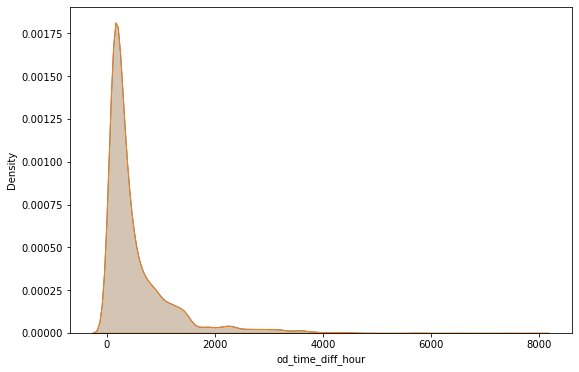

In [112]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_hp['od_time_diff_hour'],fill=True)
sns.kdeplot(df_hp['start_scan_to_end_scan'],fill=True)

Lower critical value = -15.110359492146465
Upper critical value =  14.952616771968255
Observed_mean_diff   =  0.8876661698243424


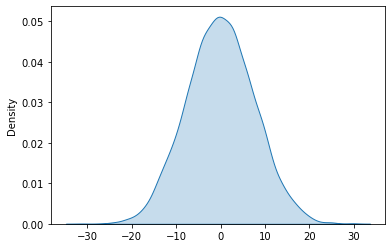

In [42]:
observed_mean_diff=np.mean(df_hp['od_time_diff_hour'])-np.mean(df_hp['start_scan_to_end_scan'])
observed_mean_diff
P=np.concatenate((df_hp['od_time_diff_hour'],df_hp['start_scan_to_end_scan']))
P
len(P)/2
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)
np.mean(test_sample)
np.std(test_sample)
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('Lower critical value =',lcv)
print('Upper critical value = ',ucv)
print('Observed_mean_diff   = ',observed_mean_diff)

<b>Insights :</b>
- ><b>Observed mean difference 0.89 is within the range of acceptance region. So, Null hypothesis is accepted 
- ><b>This concludes that the aggregated values for 'total trip time' and 'total time taken for product delivery' are approximately close together

### Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value.

In [43]:
df_hp[['actual_time', 'osrm_time']]

,actual_time,osrm_time
0,1562.0,743.0
1,143.0,68.0
2,3347.0,1741.0
3,59.0,15.0
4,341.0,117.0
...,...,...
14812,83.0,62.0
14813,21.0,12.0
14814,282.0,54.0
14815,264.0,184.0


<b>H0 : Mean of actual_time and osrm_time are same.<br>
<b>H1 : Mean of actual_time and osrm_time are not the same.

<AxesSubplot:xlabel='actual_time', ylabel='Density'>

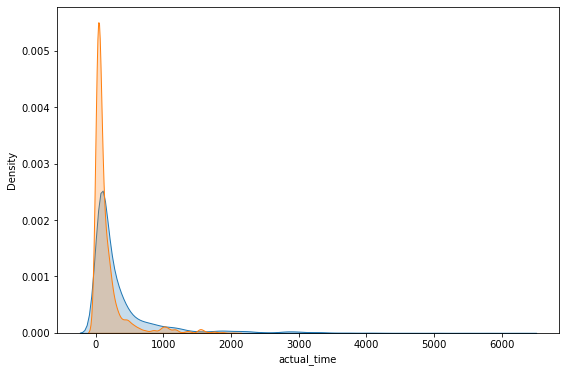

In [113]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_hp['actual_time'],fill=True)
sns.kdeplot(df_hp['osrm_time'],fill=True)

Lower critical value = -10.26092470103785
Upper critical value =  10.333744651095213
Observed_mean_diff   =  195.07255179860968


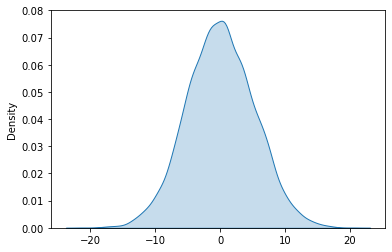

In [44]:
observed_mean_diff=np.mean(df_hp['actual_time'])-np.mean(df_hp['osrm_time'])
observed_mean_diff
P=np.concatenate((df_hp['actual_time'],df_hp['osrm_time']))
P
len(P)/2
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)
np.mean(test_sample)
np.std(test_sample)
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('Lower critical value =',lcv)
print('Upper critical value = ',ucv)
print('Observed_mean_diff   = ',observed_mean_diff)

<b>Insights :</b>
- ><b>Observed mean difference 195.07 is not within the range of acceptance region. So, Alternate hypothesis is accepted.
- ><b>This concludes that the aggregated values for 'actual time' and 'estimated time' for product delivery are not close together. 

### Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value.

In [45]:
df_hp[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14812,83.0,82.0
14813,21.0,21.0
14814,282.0,281.0
14815,264.0,258.0


<b>H0 : Mean of actual_time and segment_actual_time_sum are same.<br>
<b>H1 : Mean of actual_time and segment_actual_time_sum are not the same.

<AxesSubplot:xlabel='actual_time', ylabel='Density'>

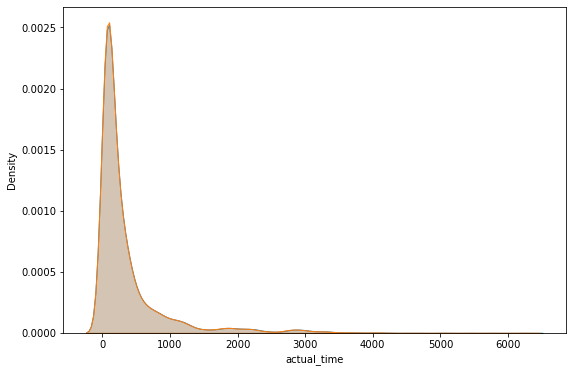

In [118]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_hp['actual_time'],fill=True)
sns.kdeplot(df_hp['segment_actual_time_sum'],fill=True)

Lower critical value = -12.632526559431657
Upper critical value =  12.608118460626226
Observed_mean_diff   =  3.251467908483505


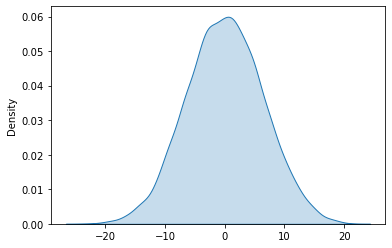

In [46]:
observed_mean_diff=np.mean(df_hp['actual_time'])-np.mean(df_hp['segment_actual_time_sum'])
observed_mean_diff
P=np.concatenate((df_hp['actual_time'],df_hp['segment_actual_time_sum']))
P
len(P)/2
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)
np.mean(test_sample)
np.std(test_sample)
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('Lower critical value =',lcv)
print('Upper critical value = ',ucv)
print('Observed_mean_diff   = ',observed_mean_diff)

<b>Insights :</b>
- ><b>Observed mean difference 3.25 is within the range of acceptance region. So, Null hypothesis is accepted
- ><b>This concludes that the aggregated values for 'actual time' and 'segmented actual time' for product delivery are approximately close together

### Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value.

In [47]:
df_hp[['osrm_distance', 'segment_osrm_distance_sum']]

,osrm_distance,segment_osrm_distance_sum
0,991.3523,1320.4733
1,85.1110,84.1894
2,2354.0665,2545.2678
3,19.6800,19.8766
4,146.7918,146.7919
...,...,...
14812,73.4630,64.8551
14813,16.0882,16.0883
14814,58.9037,104.8866
14815,171.1103,223.5324


<b>H0 : Mean of osrm_distance and segment_osrm_distance_sum are same.<br>
<b>H1 : Mean of osrm_distance and segment_osrm_distance_sum are not the same.

<AxesSubplot:xlabel='osrm_distance', ylabel='Density'>

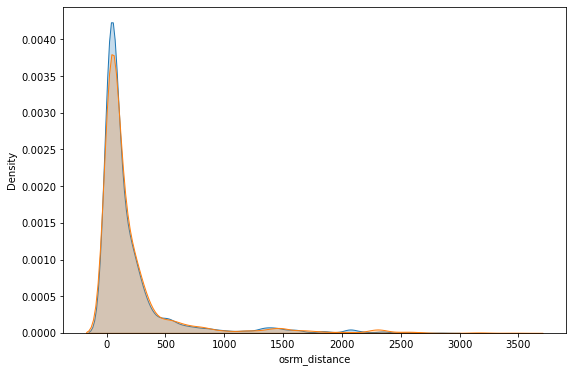

In [119]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_hp['osrm_distance'],fill=True)
sns.kdeplot(df_hp['segment_osrm_distance_sum'],fill=True)

Lower critical value = -9.09393854492961
Upper critical value =  9.005638611536883
Observed_mean_diff   = -18.856472113113796


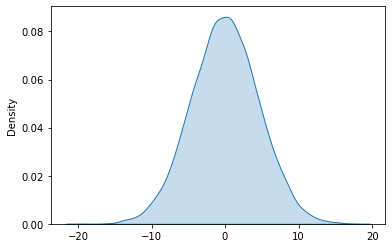

In [48]:
observed_mean_diff=np.mean(df_hp['osrm_distance'])-np.mean(df_hp['segment_osrm_distance_sum'])
observed_mean_diff
P=np.concatenate((df_hp['osrm_distance'],df_hp['segment_osrm_distance_sum']))
P
len(P)/2
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)
np.mean(test_sample)
np.std(test_sample)
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('Lower critical value =',lcv)
print('Upper critical value = ',ucv)
print('Observed_mean_diff   =',observed_mean_diff)

<b>Insights :</b>
- ><b>Observed mean difference -18.85 is not within the range of acceptance region. So, Alternate hypothesis is accepted
- ><b>This concludes that the aggregated values for 'estimate distance' and 'segmented estimate distance' for product delivery are not close together

### Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value.

In [49]:
df_hp[['osrm_time', 'segment_osrm_time_sum']]

,osrm_time,segment_osrm_time_sum
0,743.0,1008.0
1,68.0,65.0
2,1741.0,1941.0
3,15.0,16.0
4,117.0,115.0
...,...,...
14812,62.0,62.0
14813,12.0,11.0
14814,54.0,88.0
14815,184.0,221.0


<b>H0 : Mean of osrm_time and segment_osrm_time_sum are same.<br>
<b>H1 : Mean of osrm_time and segment_osrm_time_sum are not the same.

<AxesSubplot:xlabel='osrm_time', ylabel='Density'>

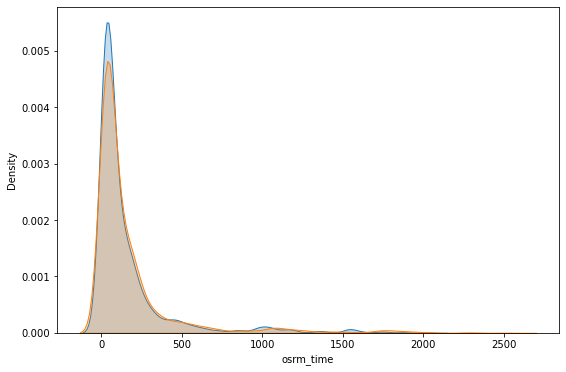

In [121]:
plt.figure(figsize=(9,6))
sns.kdeplot(df_hp['osrm_time'],fill=True)
sns.kdeplot(df_hp['segment_osrm_time_sum'],fill=True)

Lower critical value = -6.595223760858011
Upper critical value =  6.64819426770825
Observed_mean_diff   = -18.878585408652214


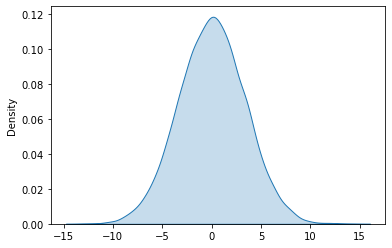

In [50]:
observed_mean_diff=np.mean(df_hp['osrm_time'])-np.mean(df_hp['segment_osrm_time_sum'])
observed_mean_diff
P=np.concatenate((df_hp['osrm_time'],df_hp['segment_osrm_time_sum']))
P
len(P)/2
test_sample=[]
it=10000
for i in range(it):
    np.random.shuffle(P)
    new_c1=P[:14817]
    new_c2=P[14817:]
    mean_diff= np.mean(new_c1)-np.mean(new_c2)
    test_sample.append(mean_diff)
sns.kdeplot(test_sample,fill=True)
np.mean(test_sample)
np.std(test_sample)
ucv=( norm.ppf(0.975)*np.std(test_sample) + np.mean(test_sample))
lcv=( norm.ppf(0.025)*np.std(test_sample) + np.mean(test_sample))
print('Lower critical value =',lcv)
print('Upper critical value = ',ucv)
print('Observed_mean_diff   =',observed_mean_diff)

<b>Insights :</b>
- ><b>Observed mean difference -18.87 is not within the range of acceptance region. So, Alternate hypothesis is accepted.
- ><b>This concludes that the aggregated values for 'estimate time' and 'segmented estimate time' for product delivery are not close together.

### Find outliers in the numerical variables (you might find outliers in almost all the variables), and check it using visual analysis.

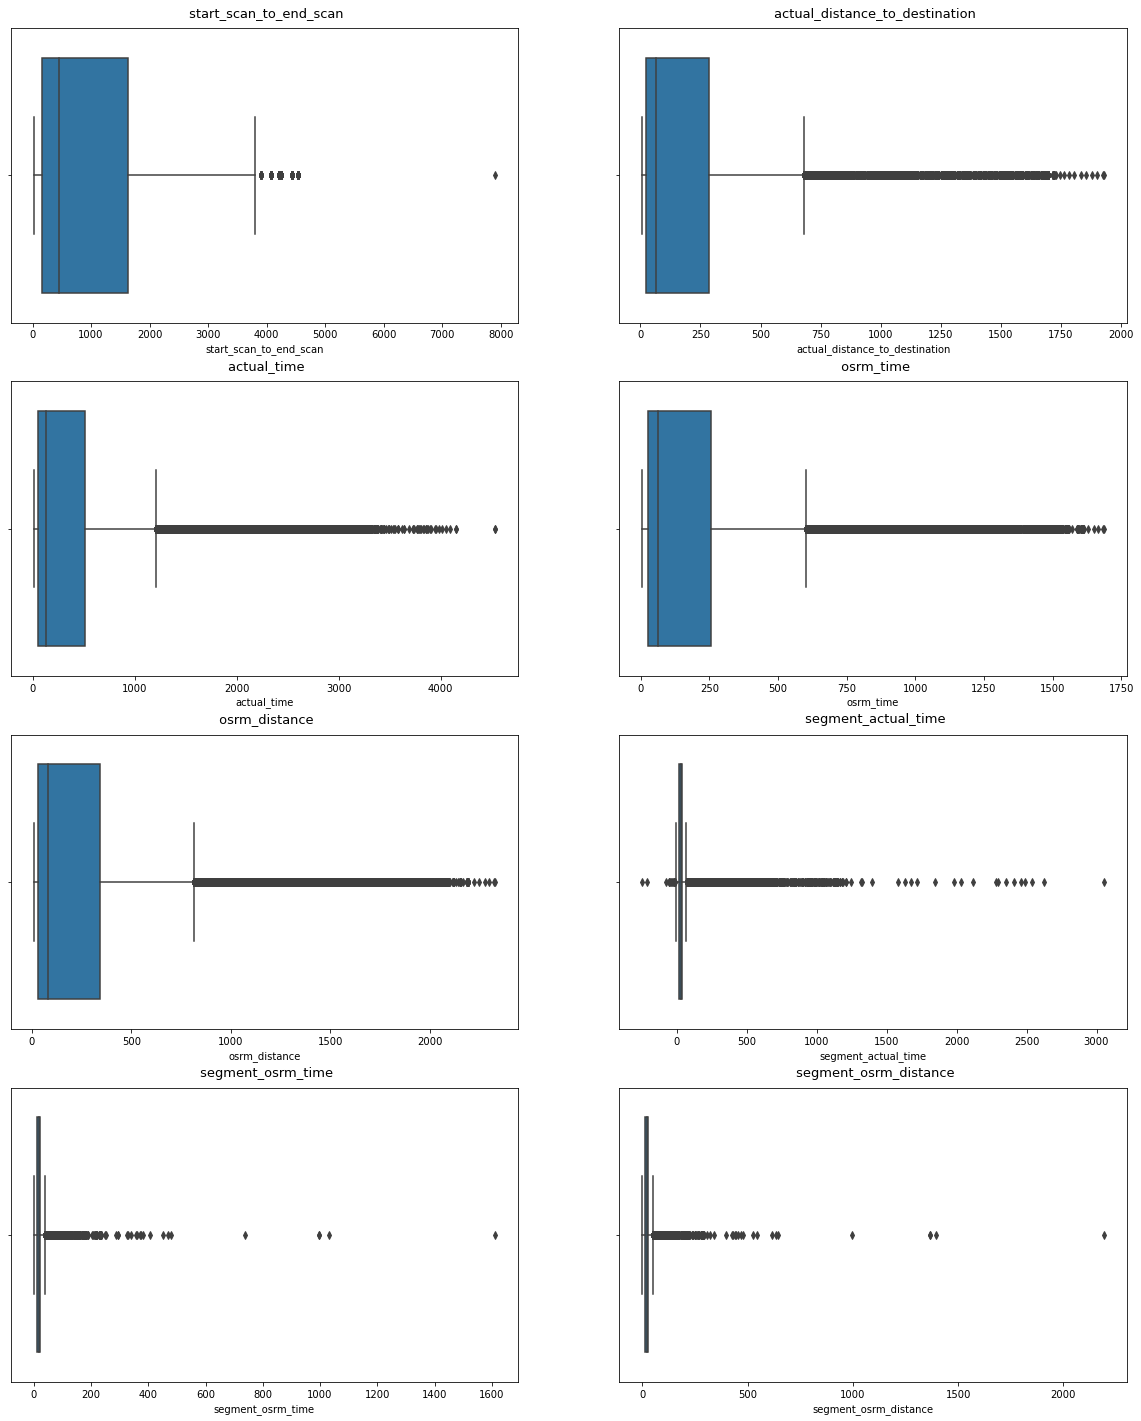

In [51]:
attrs=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
 'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(4):
    for col in range(2):
        sns.boxplot(data=df, x=attrs[count], ax=axs[row, col])
        axs[row,col].set_title(f" {attrs[count]}", pad=12, fontsize=13)
        count +=1
plt.show()


### Handle the outliers using the IQR method.

In [52]:
da=df.copy()
# Mean and median of attrs values shows large diffrance. So, we need to find outlayer values of purchace
attrs=['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
 'osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']
for i in attrs:
    q1=df[i].quantile(.25)
    q3=df[i].quantile(.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    print('lower limit of',i,'=',lower)
    print('upper limit of',i,'=',upper)
    print('----------------------------------------------------------------')
    da=da[~((da[i]<lower)|(da[i]>upper))]
da

lower limit of start_scan_to_end_scan = -2048.5
upper limit of start_scan_to_end_scan = 3843.5
----------------------------------------------------------------
lower limit of actual_distance_to_destination = -371.6736259929169
upper limit of actual_distance_to_destination = 681.7383749520162
----------------------------------------------------------------
lower limit of actual_time = -642.0
upper limit of actual_time = 1206.0
----------------------------------------------------------------
lower limit of osrm_time = -318.0
upper limit of osrm_time = 602.0
----------------------------------------------------------------
lower limit of osrm_distance = -440.0031250000001
upper limit of osrm_distance = 813.1110750000001
----------------------------------------------------------------
lower limit of segment_actual_time = -10.0
upper limit of segment_actual_time = 70.0
----------------------------------------------------------------
lower limit of segment_osrm_time = -5.5
upper limit of segm

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,df_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.272727,14.0,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0,86.213637
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.200000,10.0,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0,86.213637
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.428571,16.0,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0,86.213637
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.550000,21.0,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0,86.213637
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.545455,6.0,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0,86.213637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144861,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,1.306452,11.0,12.0,9.5478,0.916667,trip-153746066843555182IND131028AABIND000000ACB,80.0,57.1629,82.0,427.686364
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,1.566667,12.0,12.0,8.1858,1.000000,trip-153746066843555182IND131028AABIND000000ACB,92.0,65.3487,94.0,427.686364
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,1.578947,26.0,21.0,17.3725,1.238095,trip-153746066843555182IND131028AABIND000000ACB,118.0,82.7212,115.0,427.686364
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,1.590909,20.0,34.0,20.7053,0.588235,trip-153746066843555182IND131028AABIND000000ACB,138.0,103.4265,149.0,427.686364


### Do one-hot encoding of categorical variables (like route_type).

In [53]:
one_hot_encoding = pd.get_dummies(df,columns=['route_type'])
one_hot_encoding

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,df_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,route_type_Carting,route_type_FTL
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,11.0,11.9653,1.272727,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0,86.213637,1,0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,9.0,9.7590,1.111111,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0,86.213637,1,0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,7.0,10.8152,2.285714,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0,86.213637,1,0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,12.0,13.0224,1.750000,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0,86.213637,1,0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,5.0,3.9153,1.200000,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,12.0,8.1858,1.000000,trip-153746066843555182IND131028AABIND000000ACB,92.0,65.3487,94.0,427.686364,1,0
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,21.0,17.3725,1.238095,trip-153746066843555182IND131028AABIND000000ACB,118.0,82.7212,115.0,427.686364,1,0
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,34.0,20.7053,0.588235,trip-153746066843555182IND131028AABIND000000ACB,138.0,103.4265,149.0,427.686364,1,0
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,27.0,18.8885,0.629630,trip-153746066843555182IND131028AABIND000000ACB,155.0,122.3150,176.0,427.686364,1,0


<b>Insights :</b>
- ><b>The route type column containing values 'carting' and 'FTL' are successfully one hot encoded from categorical values to binary numerical values 0 and 1.

In [54]:
df_new=one_hot_encoding.drop(['data','od_start_time','od_end_time','trip_creation_time','source_name','destination_name','cutoff_timestamp','is_cutoff','cutoff_factor','segment_factor','factor','df_key','segment_actual_time_sum','segment_osrm_distance_sum','segment_osrm_time_sum'],axis=1)

In [55]:
df_new

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,route_type_Carting,route_type_FTL
0,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,86.213637,1,0
1,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,86.213637,1,0
2,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,86.213637,1,0
3,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,86.213637,1,0
4,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,IND388620AAB,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,427.686364,1,0
144863,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,427.686364,1,0
144864,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,427.686364,1,0
144865,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,IND000000ACB,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,427.686364,1,0


### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [56]:
from category_encoders import TargetEncoder
cols=['route_schedule_uuid','trip_uuid','source_center','destination_center']
te = TargetEncoder()
for col in cols:
    df_new[col] = te.fit_transform(df_new[col], df_new['segment_actual_time'])

In [57]:
df_new

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,route_type_Carting,route_type_FTL
0,15.016774,30.952799,14.878118,14.878118,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,86.213637,1,0
1,15.016774,30.952799,14.878118,14.878118,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,86.213637,1,0
2,15.016774,30.952799,14.878118,14.878118,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,86.213637,1,0
3,15.016774,30.952799,14.878118,14.878118,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,86.213637,1,0
4,15.016774,30.952799,14.878118,14.878118,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,86.213637,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,26.440080,38.894273,31.677170,35.345313,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858,427.686364,1,0
144863,26.440080,38.894273,31.677170,35.345313,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725,427.686364,1,0
144864,26.440080,38.894273,31.677170,35.345313,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053,427.686364,1,0
144865,26.440080,38.894273,31.677170,35.345313,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885,427.686364,1,0


In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
std_data = scaler.fit_transform(df_new)
std_data = pd.DataFrame(std_data, columns=df_new.columns)
std_data

,route_schedule_uuid,trip_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff_hour,route_type_Carting,route_type_FTL
0,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.648246,-0.673677,-0.658642,-0.647814,-0.414331,-0.508094,-0.608251,-0.844299,1.484765,-1.484765
1,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.623604,-0.656958,-0.629422,-0.624640,-0.488998,-0.643449,-0.731779,-0.844299,1.484765,-1.484765
2,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.598385,-0.630207,-0.603449,-0.598958,-0.376997,-0.778805,-0.672644,-0.844299,1.484765,-1.484765
3,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.573802,-0.593424,-0.564489,-0.568034,-0.283663,-0.440416,-0.549064,-0.844299,1.484765,-1.484765
4,-1.365871,-0.833199,-1.271816,-1.422922,-0.844026,-0.564329,-0.583392,-0.551502,-0.547479,-0.563666,-0.914160,-1.058963,-0.844299,1.484765,-1.484765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.547308,-0.539921,-0.499556,-0.514923,-0.451665,-0.440416,-0.819862,-0.515013,1.484765,-1.484765
144863,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.521701,-0.496450,-0.447610,-0.472762,-0.190329,0.168683,-0.305506,-0.515013,1.484765,-1.484765
144864,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.486711,-0.463011,-0.408650,-0.445666,-0.302330,1.048494,-0.118905,-0.515013,1.484765,-1.484765
144865,-0.632065,0.346453,-0.244435,-0.053923,-0.515196,-0.464921,-0.432916,-0.376183,-0.412000,-0.358330,0.574750,-0.220626,-0.515013,1.484765,-1.484765


### Data Visualization

### Which route type is mostly used ?

[]

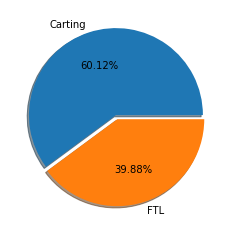

In [59]:
plt.pie(data=df_hp,x=df_hp['route_type'].value_counts(),shadow=True,labels=['Carting','FTL'],explode=(0,0.05),autopct='%0.2f%%')
plt.plot()

<b>Insights :</b>
###### --->  From the above observation we can say that  Carting route type is mostly used.

### Which route type takes more time to reach destination?

[]

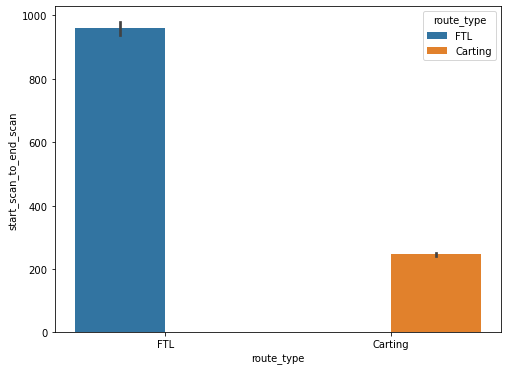

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_hp.route_type,y=df_hp.start_scan_to_end_scan,data=df_hp,hue='route_type')
plt.plot()

<b>Insights :</b>
###### --->  From the above observation we can say that  Full Truck Load takes more time than carting to reach destination.

[]

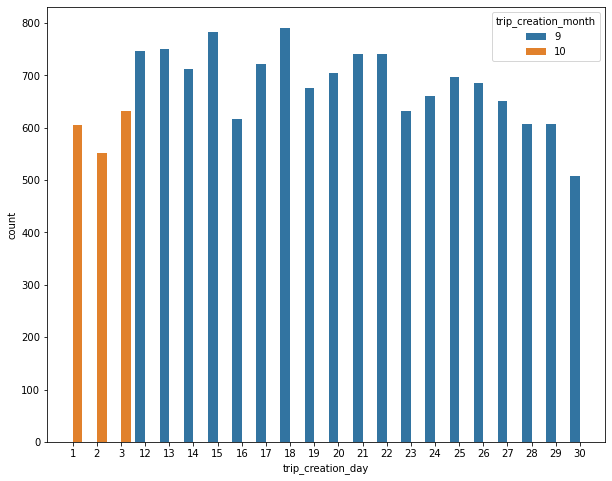

In [61]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_hp['trip_creation_day'],hue=df_hp['trip_creation_month'])
plt.plot()

### Top ten states with the most deliveries

In [62]:
x=df_hp.groupby('dest_state')['trip_uuid'].count().sort_values(ascending=False).head(10).to_frame().reset_index()
x

,dest_state,trip_uuid
0,maharashtra,2561
1,karnataka,2294
2,haryana,1670
3,tamil nadu,1084
4,uttar pradesh,811
5,telangana,784
6,gujarat,734
7,west bengal,697
8,delhi,652
9,punjab,617


Text(0.5, 1.0, 'Top 10 states with most Deliveries')

<Figure size 864x432 with 0 Axes>

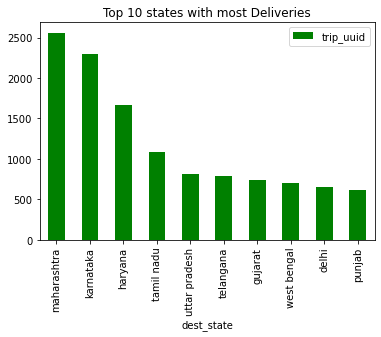

In [63]:
plt.figure(figsize=(12,6))
x.plot(kind='bar',x='dest_state',color='g')
plt.title('Top 10 states with most Deliveries')

<b>Insights :</b><br>
###### ---> Maharashtra has the most number of deliveries.

### Top ten places having most deliveries.

In [64]:
x=df_hp.groupby(['dest_place','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(10).to_frame().reset_index()
x

,dest_place,dest_state,trip_uuid
0,bilaspur,haryana,891
1,nelmngla,karnataka,548
2,mankoli,maharashtra,434
3,bomsndra,karnataka,346
4,shamshbd,telangana,339
5,kundli,haryana,320
6,mehmdpur,punjab,274
7,kgairprt,karnataka,272
8,tathawde,maharashtra,258
9,dankuni,west bengal,235


Text(0.5, 1.0, 'Top 10 places with most Deliveries')

<Figure size 864x432 with 0 Axes>

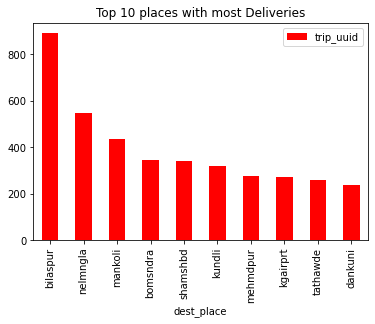

In [65]:
plt.figure(figsize=(12,6))
x.plot(kind='bar',x='dest_place',color='r')
plt.title('Top 10 places with most Deliveries')

<b>Insights :</b><br>
###### ---> From the above observation we can say that Bilaspur in Haryana is the place having most deliveries in the whole state.

### Top ten cities having most deliveries.

In [66]:
x=df_hp.groupby(['dest_city','dest_state'])['trip_uuid'].count().sort_values(ascending=False).head(10).to_frame().reset_index()
x

,dest_city,dest_state,trip_uuid
0,bengaluru,karnataka,1088
1,mumbai,maharashtra,966
2,gurgaon,haryana,904
3,bangalore,karnataka,551
4,delhi,delhi,549
5,hyderabad,telangana,499
6,bhiwandi,maharashtra,434
7,chennai,tamil nadu,410
8,sonipat,haryana,322
9,pune,maharashtra,313


Text(0.5, 1.0, 'Top 10 places with most Deliveries')

<Figure size 864x432 with 0 Axes>

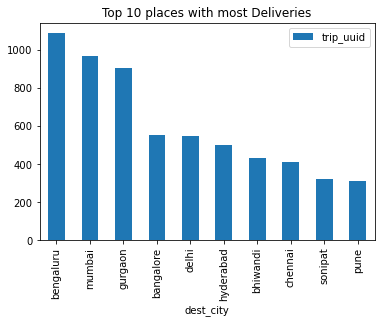

In [67]:
plt.figure(figsize=(12,6))
x.plot(kind='bar',x='dest_city')
plt.title('Top 10 places with most Deliveries')

<b>Insights :</b><br>
###### ---> From the above observation we can say that Bengaluru in Karnataka have more delivery compaired to other cities. 

### Which state has more source center

<AxesSubplot:xlabel='source_state'>

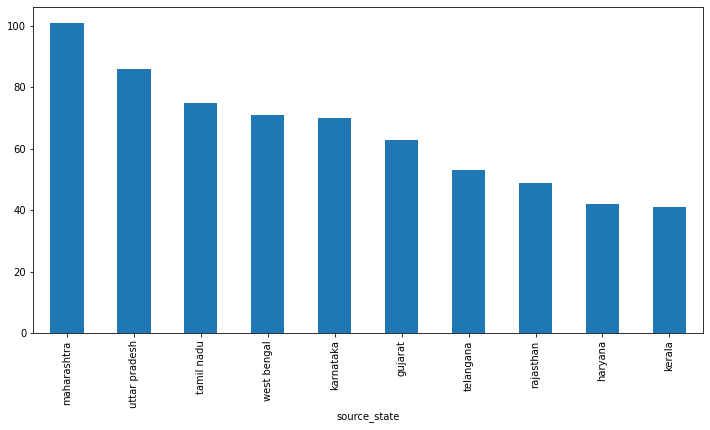

In [68]:
plt.figure(figsize=(12,6))
df_hp.groupby('source_state')['source_center'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')

<b>Insights :</b>
###### --->  From the above observation we can say that Indian states with most source centres are :
- ><b>Maharashtra
- ><b>Uttar Pradesh
- ><b>Tamil Nadu
- ><b>West Bengal and
- ><b>Karnataka


### Which state has more destination center.

<AxesSubplot:xlabel='dest_state'>

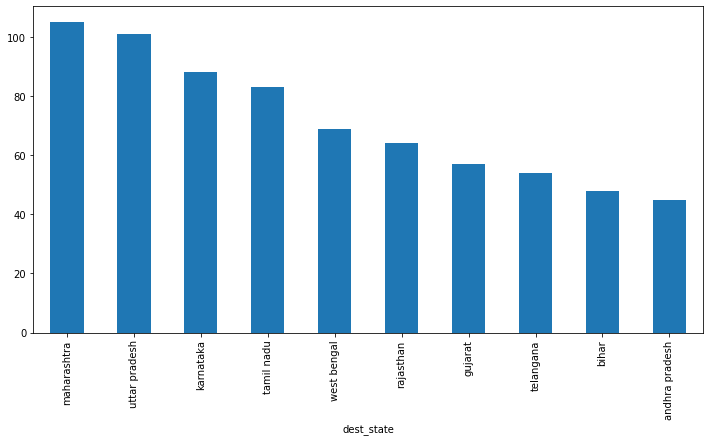

In [69]:
plt.figure(figsize=(12,6))
df_hp.groupby('dest_state')['destination_center'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')

<b>Insights :</b>
###### --->  From the above observation we can say that Indian states with most delivery destination centres are :
- ><b>Maharashtra
- ><b>Uttar Pradesh
- ><b>Haryana
- ><b>Karnataka and
- ><b>Tamil Nadu

In [93]:
df_hp['weekday'] = df_hp['trip_creation_time'].dt.day_name()
df_hp

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,dest_place,dest_state,source_city,source_place,source_state,trip_creation_year,trip_creation_month,trip_creation_day,weekday,month
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,central,uttar pradesh,kanpur,central,uttar pradesh,2018,9,12,Wednesday,September
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,chikadpp,karnataka,doddablpur,chikadpp,karnataka,2018,9,12,Wednesday,September
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,bilaspur,haryana,gurgaon,bilaspur,haryana,2018,9,12,Wednesday,September
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,mirard,maharashtra,mumbai hub,None,maharashtra,2018,9,12,Wednesday,September
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,wrdn1dpp,karnataka,bellary,dc,karnataka,2018,9,12,Wednesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,mehmdpur,punjab,chandigarh,mehmdpur,punjab,2018,10,3,Wednesday,October
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,blbgarh,haryana,fbd,balabhgarh,haryana,2018,10,3,Wednesday,October
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,kanpur_govndngr_dc (uttar pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,govndngr,uttar pradesh,kanpur,govndngr,uttar pradesh,2018,10,3,Wednesday,October
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,shnmgprm,tamil nadu,tirunelveli,vdkkusrt,tamil nadu,2018,10,3,Wednesday,October


In [94]:
x=df_hp['weekday'].value_counts().to_frame('count').reset_index()
x

,index,count
0,Wednesday,2739
1,Saturday,2130
2,Thursday,2106
3,Friday,2060
4,Tuesday,2040
5,Monday,1987
6,Sunday,1755


[]

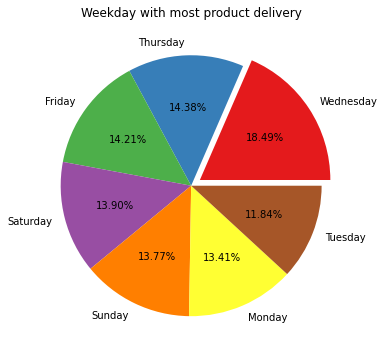

In [95]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set1')
plt.pie(data=x, x=x['count'], colors=palette_color, labels=['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday','Tuesday'], explode=(0.08,0,0,0,0,0,0), autopct='%0.2f%%')
plt.title('Weekday with most product delivery')
plt.plot()

<b>Insights :</b>
###### --->  From the above observation we can say that wednesday most number of deliveries.

In [98]:
df_hp['month'] = df_hp['trip_creation_time'].dt.month_name()

In [99]:
x=df_hp['month'].value_counts().to_frame('count').reset_index()
x

,index,count
0,September,13029
1,October,1788


[]

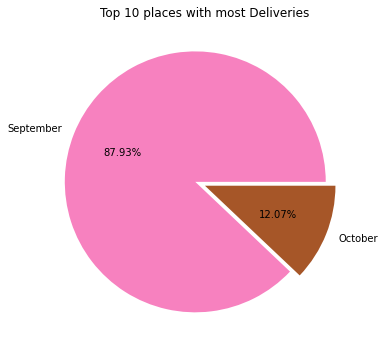

In [104]:
plt.figure(figsize=(8,6))
palette_color = sns.color_palette('Set1_r')
plt.pie(data=x, x=x['count'], colors=palette_color, labels=['September', 'October'], explode=(0.08,0), autopct='%0.2f%%')
plt.title('Top 10 places with most Deliveries')
plt.plot()


<b>Insights :</b>
###### --->  From the above observation we can say that most number of deliveries  is over the period of two months, september and october.
- ><b>Majority of the product delivery is done across the month of september.

### Relation between actual time and osrm time. 

In [73]:
x1=df_hp.groupby('source_state').agg({'actual_time':'mean','osrm_time':'mean'}).reset_index()
x1=pd.melt(x1, id_vars=['source_state'], value_vars=['actual_time', 'osrm_time'])
x1

,source_state,variable,value
0,andhra pradesh,actual_time,398.435484
1,arunachal pradesh,actual_time,429.250000
2,assam,actual_time,540.171642
3,bihar,actual_time,492.645714
4,chandigarh,actual_time,168.741935
5,chhattisgarh,actual_time,174.139535
6,dadra and nagar haveli,actual_time,48.333333
7,delhi,actual_time,230.550824
8,goa,actual_time,540.138462
9,gujarat,actual_time,331.470667


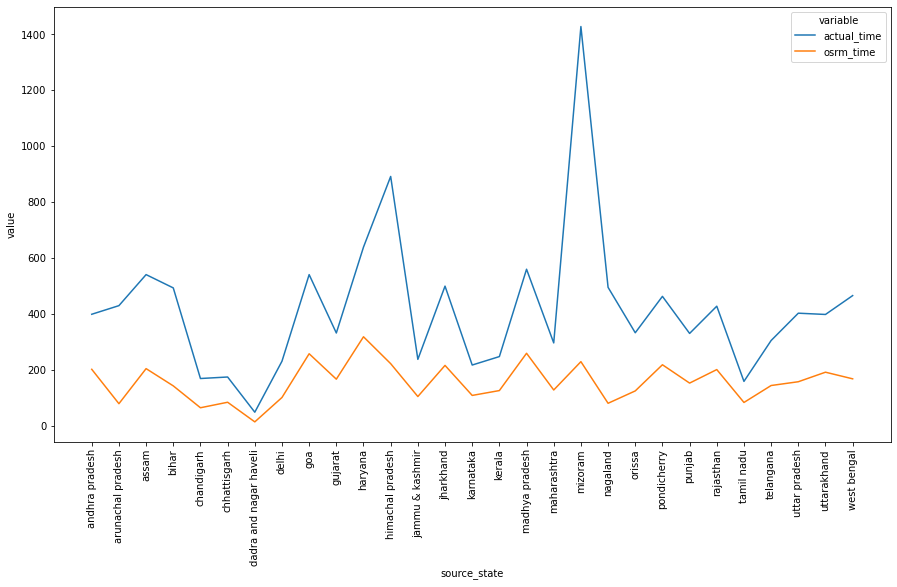

In [74]:
plt.figure(figsize=(15,8))
sns.lineplot(data=x1,x='source_state',y='value',hue='variable')
plt.xticks(rotation=90)
plt.show()

<b>Insights :
###### --->  From the above observation we can say that :-
- > <b>Value for Actual time is always higher than that of the estimated time for product delivery.    
- > <b>In Dadra and Nagar Haveli the actual and osrm time are almost equal.
- > <b>There is not much variation in Tamil Nadu also.
- > <b>In Mizoram there is a high variation in actual and osrm time.
- > <b>In Himachal Pradesh and Haryana also have a high variation.

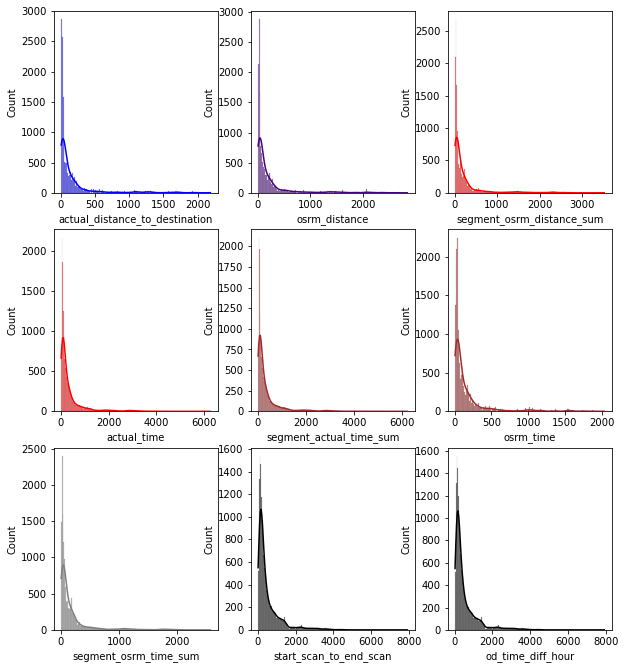

In [75]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(10,8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df_hp, x="actual_distance_to_destination", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df_hp, x="osrm_distance", kde=True,color="indigo", ax=axis[0,1])
sns.histplot(data=df_hp, x="segment_osrm_distance_sum", kde=True,color="red", ax=axis[0,2])
sns.histplot(data=df_hp, x="actual_time", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df_hp, x="segment_actual_time_sum", kde=True,color="brown", ax=axis[1,1])
sns.histplot(data=df_hp, x="osrm_time", kde=True,color="brown", ax=axis[1,2])
sns.histplot(data=df_hp, x="segment_osrm_time_sum", kde=True,color="grey", ax=axis[2,0])
sns.histplot(data=df_hp, x="start_scan_to_end_scan", kde=True,color="black", ax=axis[2,1])
sns.histplot(data=df_hp, x="od_time_diff_hour", kde=True,color="black", ax=axis[2,2])
plt.show()

<b>Insights :</b>
###### --->   From the above observations we can say that :- 
- > <b> Most of the values in actual_distance_to_destination lies in range of 0 - 500.
- > <b> Most of the values in osrm_distance lies in range of 0 - 700.
- > <b> Most of the values in segment_osrm_distance_sum lies in range of 0 - 600.
- > <b> Most of the values in actual_time lies in range of 0 - 1000.
- > <b> Most of the values in segment_actual_time_sum lies in range of 0 - 1100.
- > <b> Most of the values in osrm_time lies in range of 0 - 400.
- > <b> Most of the values in segment_osrm_time_sum lies in range of 0 - 500.
- > <b> Most of the values in start_scan_to_end_scan lies in range of 0 - 1900.
- > <b> Most of the values in od_time_diff_hour lies in range of 0 - 1900.

sns.pairplot(df_hp)

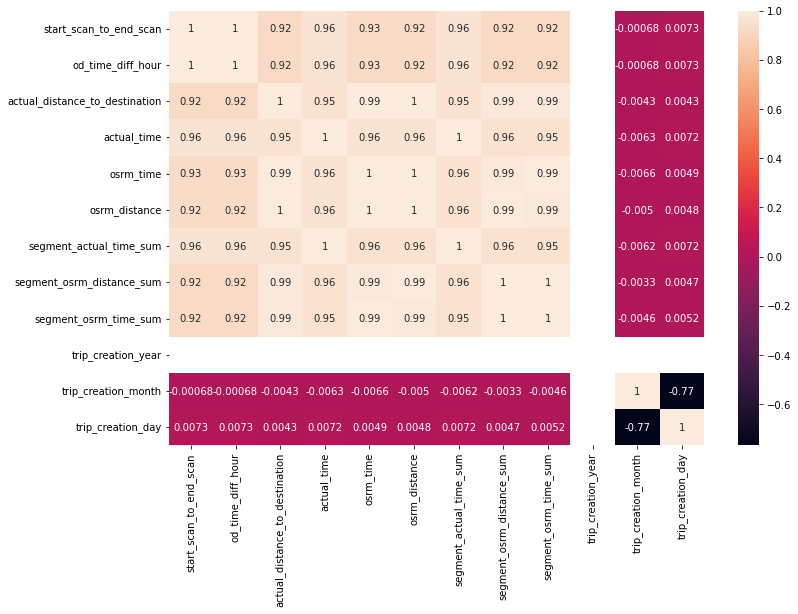

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(df_hp.corr(), annot=True)
plt.show()

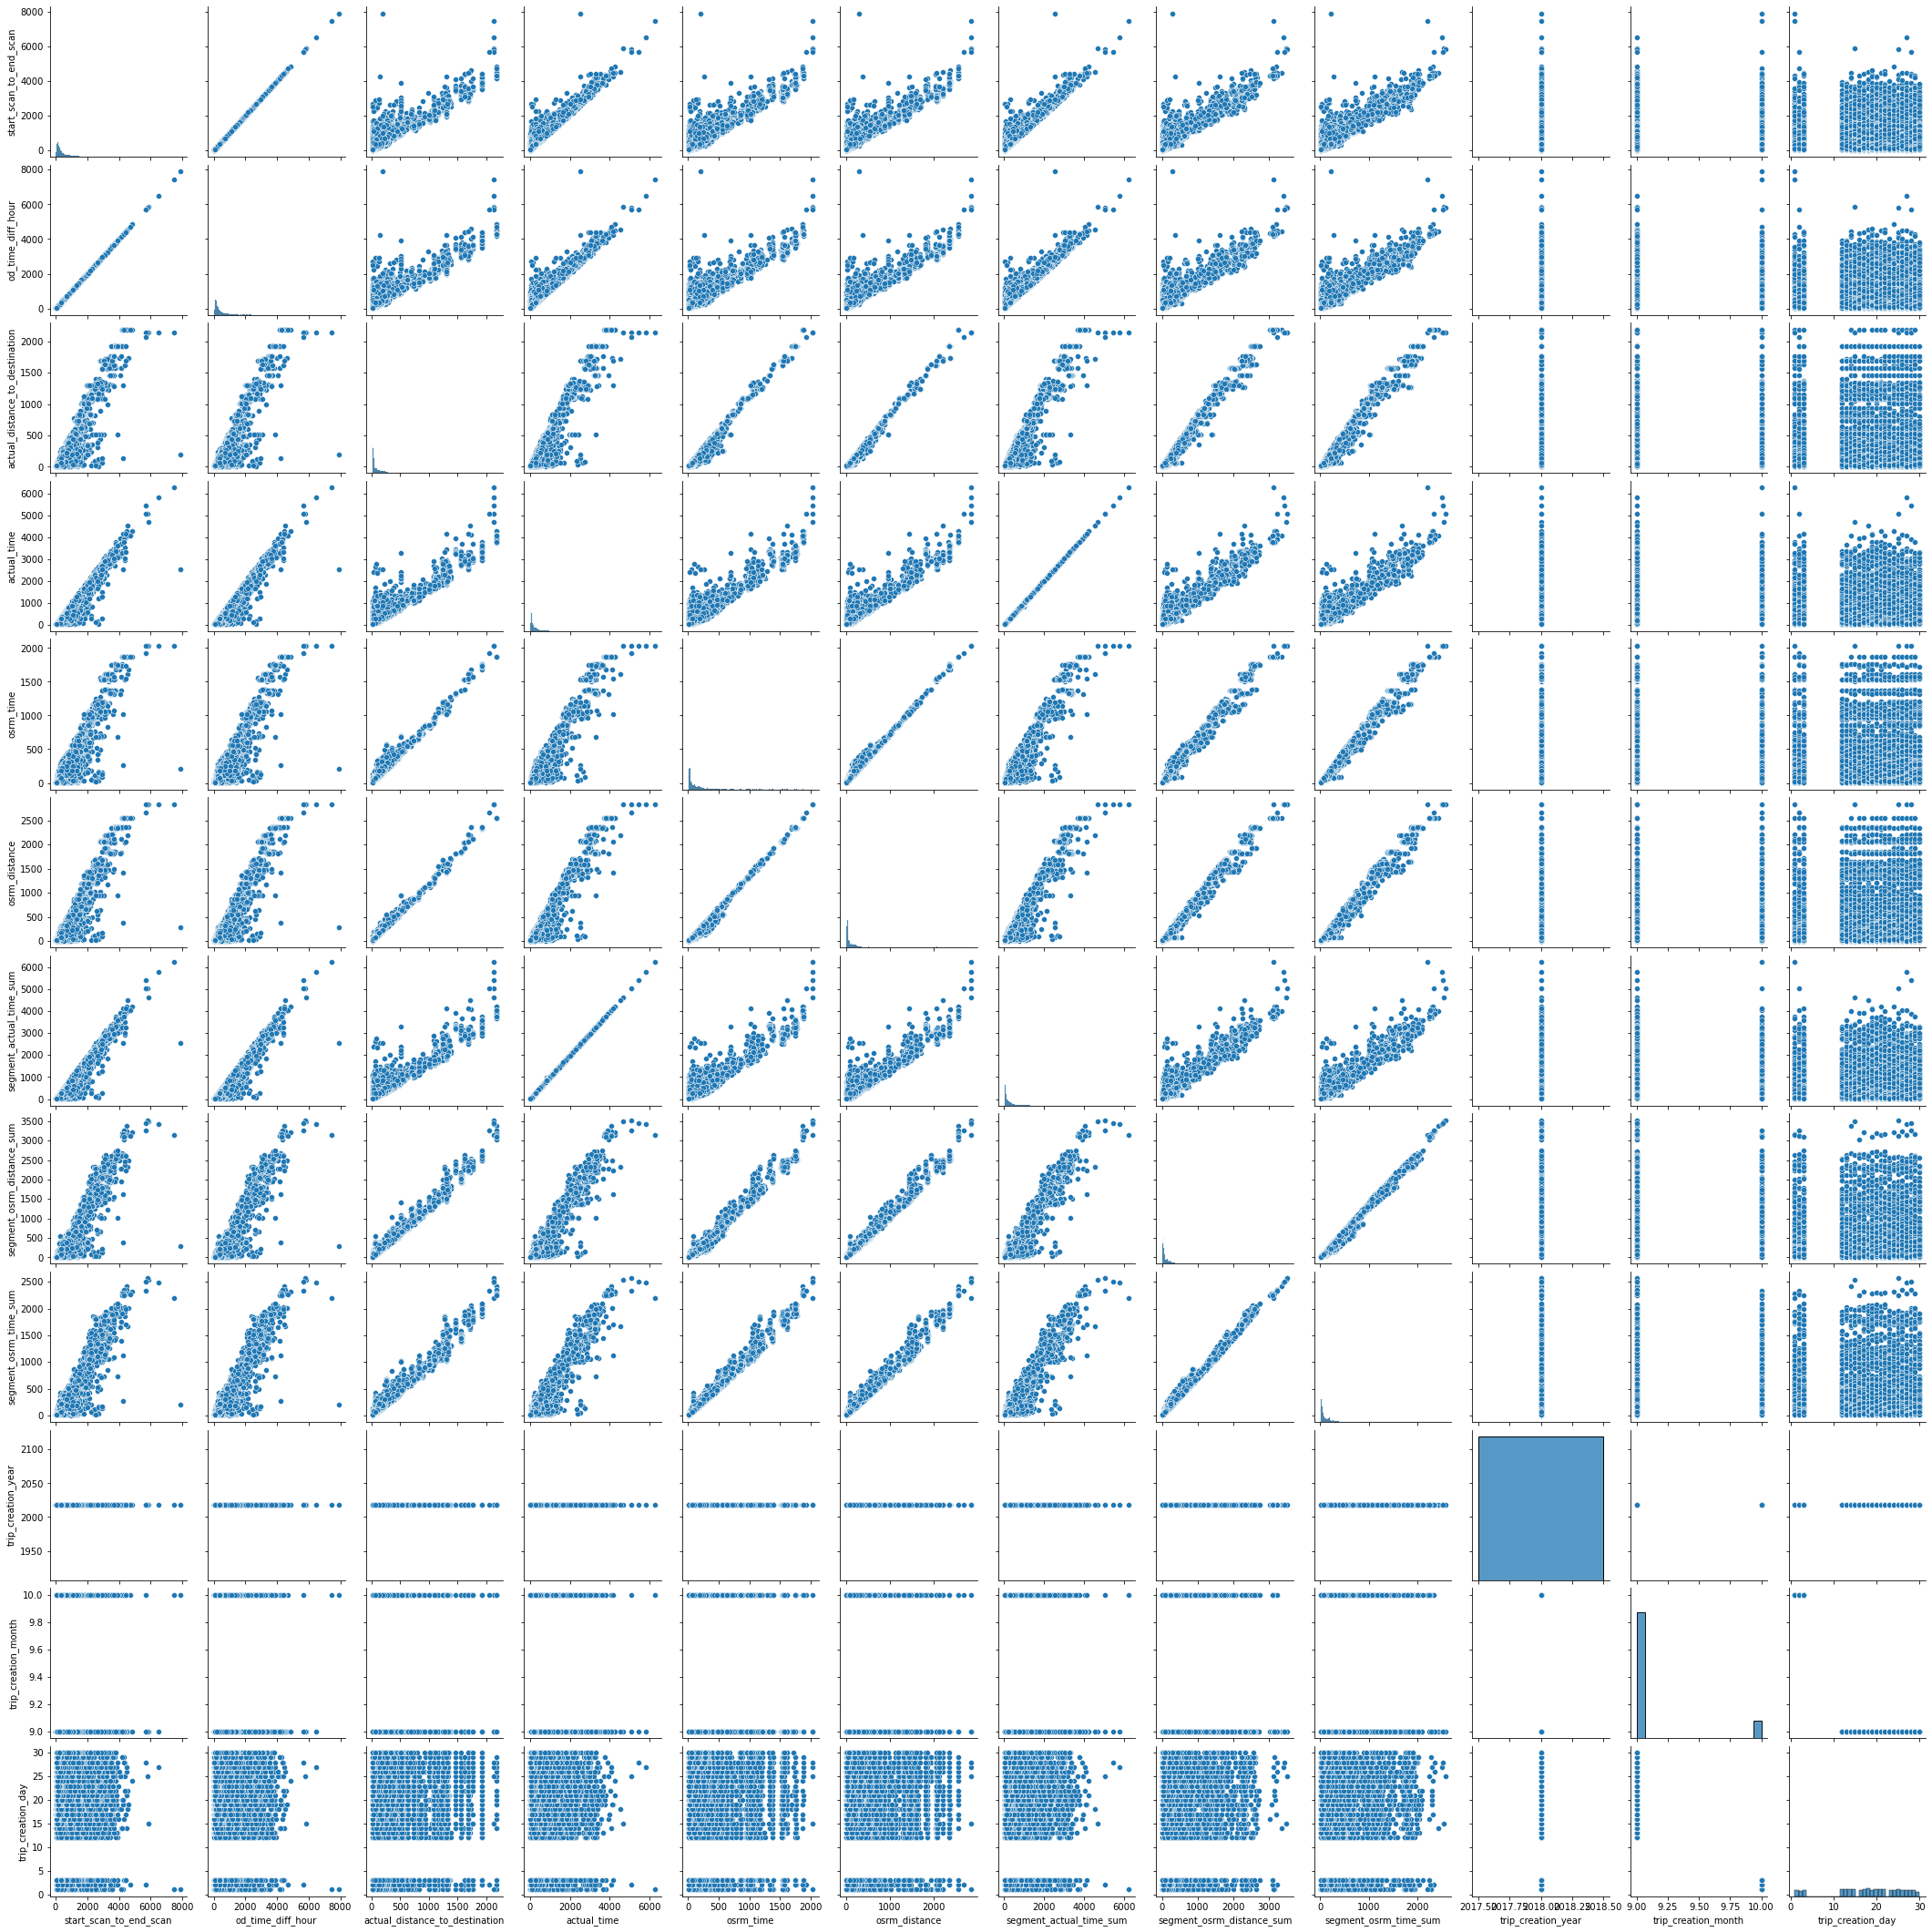

In [77]:
sns.pairplot(data=df_hp)